<a href="https://colab.research.google.com/github/sdr999/Analyzing-Student-Attributes-for-Career-Success/blob/main/Student_data_analysis_unclean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing libraires**

In [142]:
pip install wget

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wget
import requests

#**Loading dataset**

In [144]:
# Define the URL of the CSV file on GitHub
csv_file_url = "https://raw.githubusercontent.com/sdr999/Analyzing-Student-Attributes-for-Career-Success/main/Data%20analyst%20Data.csv"

# Download the CSV file
response = requests.get(csv_file_url)
with open("Data_analyst_Data.csv", "wb") as file:
    file.write(response.content)

# Read the CSV file using pandas
data = pd.read_csv("Data_analyst_Data.csv")

# Display the content of the CSV file
data.head()


,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills,Average cgpa=,8.038475685
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes,NaN,NaN
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no,NaN,NaN
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no,NaN,NaN
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no,NaN,NaN
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes,NaN,NaN


In [145]:
# Load the dataset
#data = pd.read_excel("/content/Data analyst Data.xlsx")

In [146]:
data.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Events                                                                0
Attendee Status                                                       0
College Name                                                         15
How did you come to know about this event?                         2216
Specify in "Others" (how did you come to know about this event)    4805
Designation                                                           0
Year of Graduation                                                    0
City                                                                  0
CGPA                                                                  0
Experience with python (Months)                                       0
Family Income                                                   

#**1. How many unique students are included in the dataset?**

In [147]:
# 1. How many unique students are included in the dataset?
unique_students = data["Email ID"].nunique()
print("Number of unique students:", unique_students)

Number of unique students: 2157


#**2. What is the average GPA of the students?**

In [148]:
# 2. What is the average GPA of the students?
average_gpa = data["CGPA"].mean()
print("Average GPA of students:", average_gpa)

Average GPA of students: 8.038475684511647


#**3. What is the distribution of students across different graduation years?**

In [149]:
# 3. What is the distribution of students across different graduation years?
graduation_distribution = data["Year of Graduation"].value_counts()
print("Distribution of students across graduation years:\n", graduation_distribution)

Distribution of students across graduation years:
 2023    1536
2024    1511
2025    1292
2026     555
Name: Year of Graduation, dtype: int64


#**4. What is the distribution of student's experience with Python programming?**

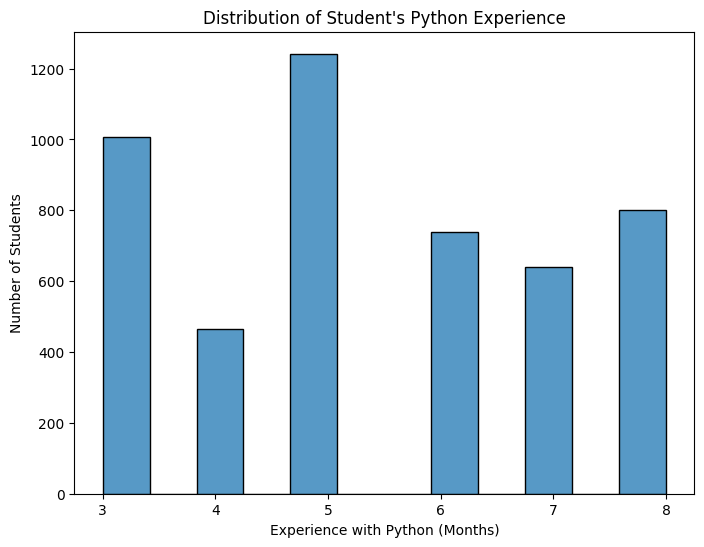

In [150]:
# 4. What is the distribution of student's experience with Python programming?
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Experience with python (Months)", bins=12)
plt.title("Distribution of Student's Python Experience")
plt.xlabel("Experience with Python (Months)")
plt.ylabel("Number of Students")
plt.show()

#**5. What is the average family income of the student?**

In [151]:
# 5. What is the average family income of the student?
# average_income = data["Family Income"].mean()
# print("Average family income of students:", average_income)
# Clean and transform Family Income column
def parse_family_income_range(income_range):
    # print(income_range)
    if income_range == "7 Lakh+":
        return 7_00_000  # Assign a representative value for "7 Lakh+"
    elif "-" in income_range:
        income_range=income_range.replace("Lakh", "")
        min_income, max_income = income_range.split("-")
        return ((int(min_income) + int(max_income)) // 2)*1_00_000
    else:
        return None

data["Cleaned Family Income"] = data["Family Income"].apply(parse_family_income_range)

# Calculate the mean income of the family
mean_family_income = data["Cleaned Family Income"].mean()
print("Mean Family Income:", mean_family_income)

Mean Family Income: 127257.86677564365


#**6. How does the GPA vary among different colleges? (Show top 5 results only)**

In [152]:
# 6. How does the GPA vary among different colleges? (Show top 5 results only)
top_colleges = data.groupby("College Name")["CGPA"].mean().nlargest(5)
print("Top 5 colleges by average GPA:\n", top_colleges)

Top 5 colleges by average GPA:
 College Name
THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER DEVELOPMENT & RESEARCH - [TIMSCDR]    8.585714
St Xavier's College                                                                  8.578571
B. K. Birla College of Arts, Science & Commerce (Autonomous), Kalyan                 8.456410
Symbiosis Institute of Technology, Pune                                              8.303448
AP SHAH INSTITUTE OF TECHNOLOGY                                                      8.283333
Name: CGPA, dtype: float64


#**7. Are there any outliers in the quantity (number of courses completed) attribute?**

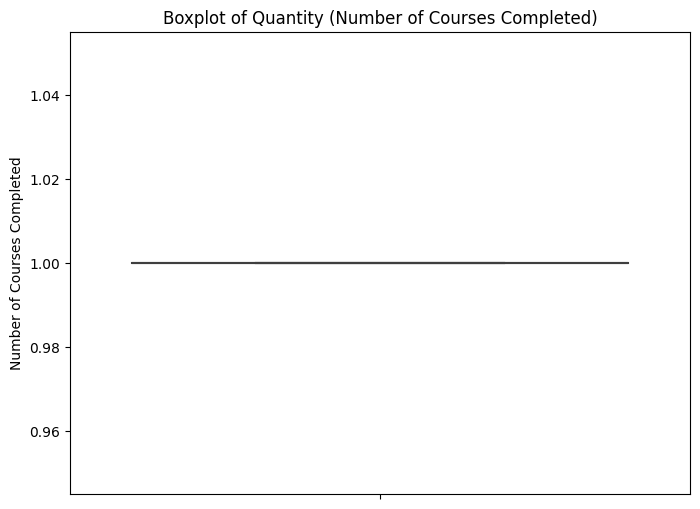

In [153]:
# 7. Are there any outliers in the quantity (number of courses completed) attribute?
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y="Quantity")
plt.title("Boxplot of Quantity (Number of Courses Completed)")
plt.ylabel("Number of Courses Completed")
plt.show()

#**8. What is the average GPA for students from each city?**

In [154]:
# 8. What is the average GPA for students from each city?
avg_gpa_by_city = data.groupby("City")["CGPA"].mean().sort_values(ascending=False)
print("Average GPA for students from each city:\n", avg_gpa_by_city)

Average GPA for students from each city:
 City
Kolhapur     8.557143
Raipur       8.507143
Sonipat      8.464286
Gurugram     8.459259
Puri         8.450000
               ...   
Panipat      7.615385
Nashik       7.592857
Daman        7.421429
Rewari       7.392308
New Delhi    7.307143
Name: CGPA, Length: 177, dtype: float64


#**9. Can we identify any relationship between family income and GPA?**

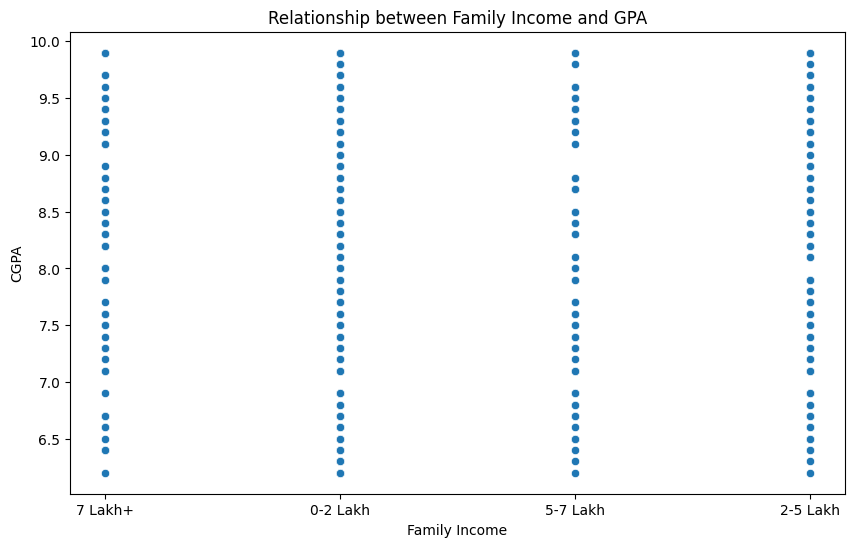

In [155]:
# 9. Can we identify any relationship between family income and GPA?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Family Income", y="CGPA")
plt.title("Relationship between Family Income and GPA")
plt.xlabel("Family Income")
plt.ylabel("CGPA")
plt.show()

#**10. How many students from various cities? (Solve using data visualization tool).**

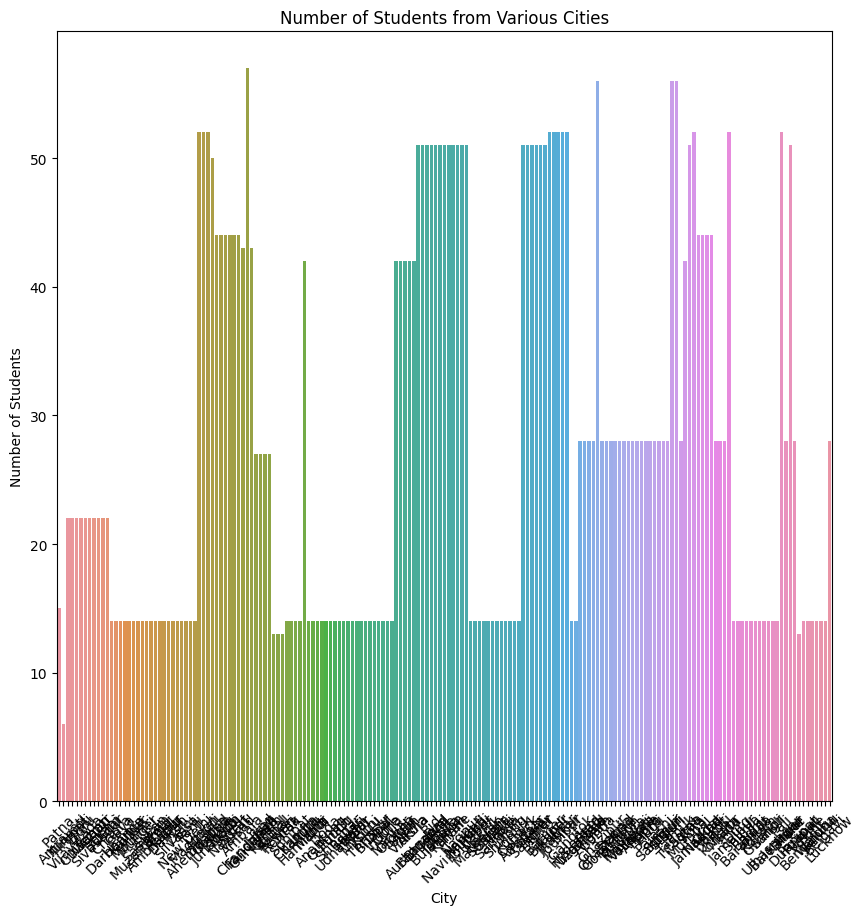

In [156]:
# 10. How many students from various cities? (Solve using data visualization tool).
plt.figure(figsize=(10, 10))
sns.countplot(data=data, x="City")
plt.title("Number of Students from Various Cities")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Students")
plt.show()

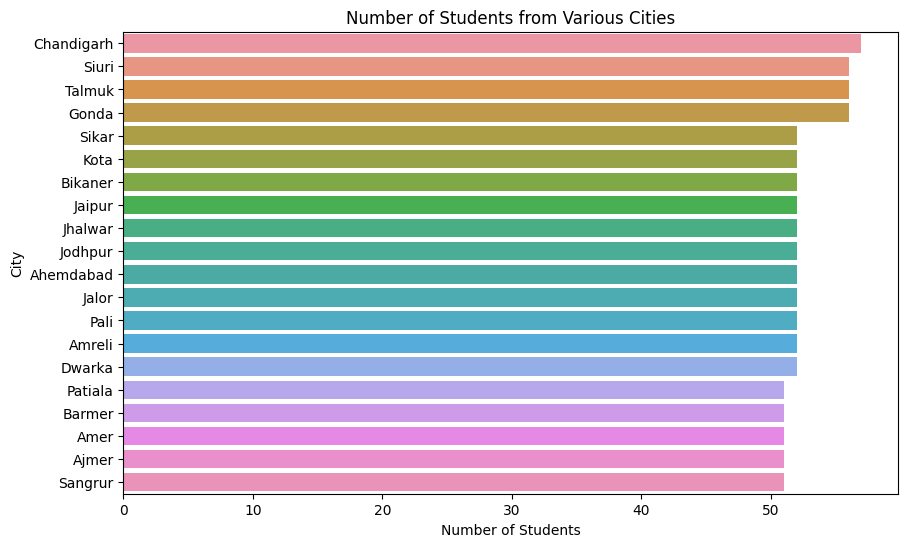

In [157]:
# Calculate the number of students from each city
city_counts = data["City"].value_counts()

# Choose the top N cities to display, and group the rest as "Other"
top_n = 20
top_cities = city_counts[:top_n]
other_cities = city_counts[top_n:].sum()

# Create a new city count series with top cities and "Other" category
#filtered_city_counts = top_cities.append(pd.Series([other_cities], index=["Other"]))

# Plot using a horizontal bar plot
plt.figure(figsize=(10, 6))
#sns.barplot(x=filtered_city_counts, y=filtered_city_counts.index)
sns.barplot(x=top_cities, y=top_cities.index)
plt.title("Number of Students from Various Cities")
plt.xlabel("Number of Students")
plt.ylabel("City")
plt.show()

#**11. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python (Months)'?**

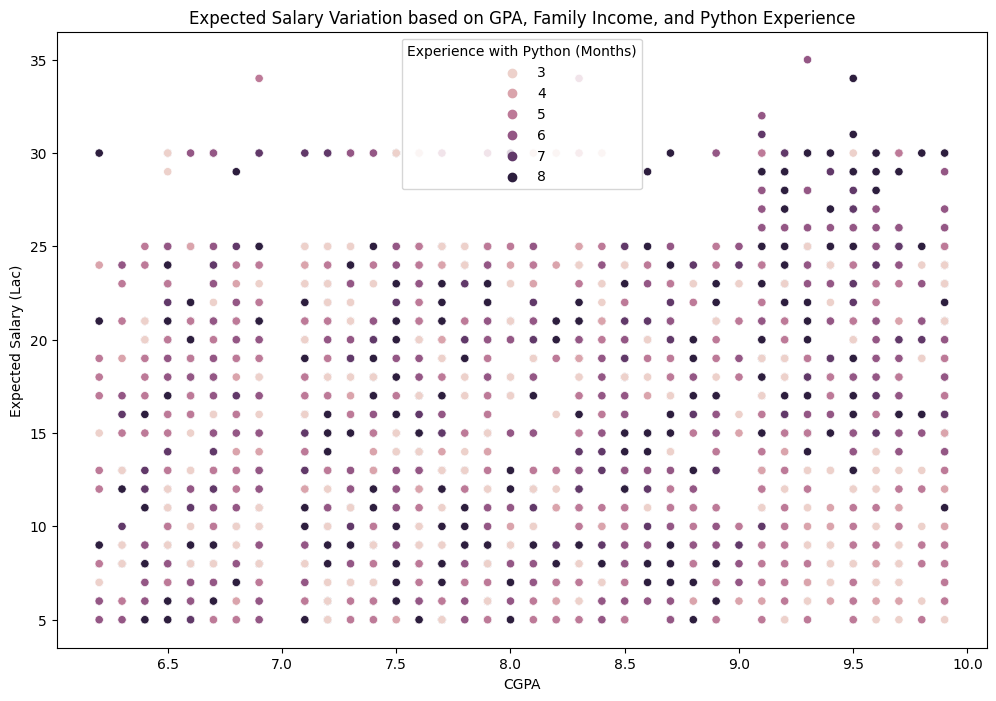

In [158]:
# 11. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python (Months)'?
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="CGPA", y="Expected salary (Lac)", hue="Experience with python (Months)")
plt.title("Expected Salary Variation based on GPA, Family Income, and Python Experience")
plt.xlabel("CGPA")
plt.ylabel("Expected Salary (Lac)")
plt.legend(title="Experience with Python (Months)")
plt.show()

#**12. Which event tend to attract more students from specific fields of study?**

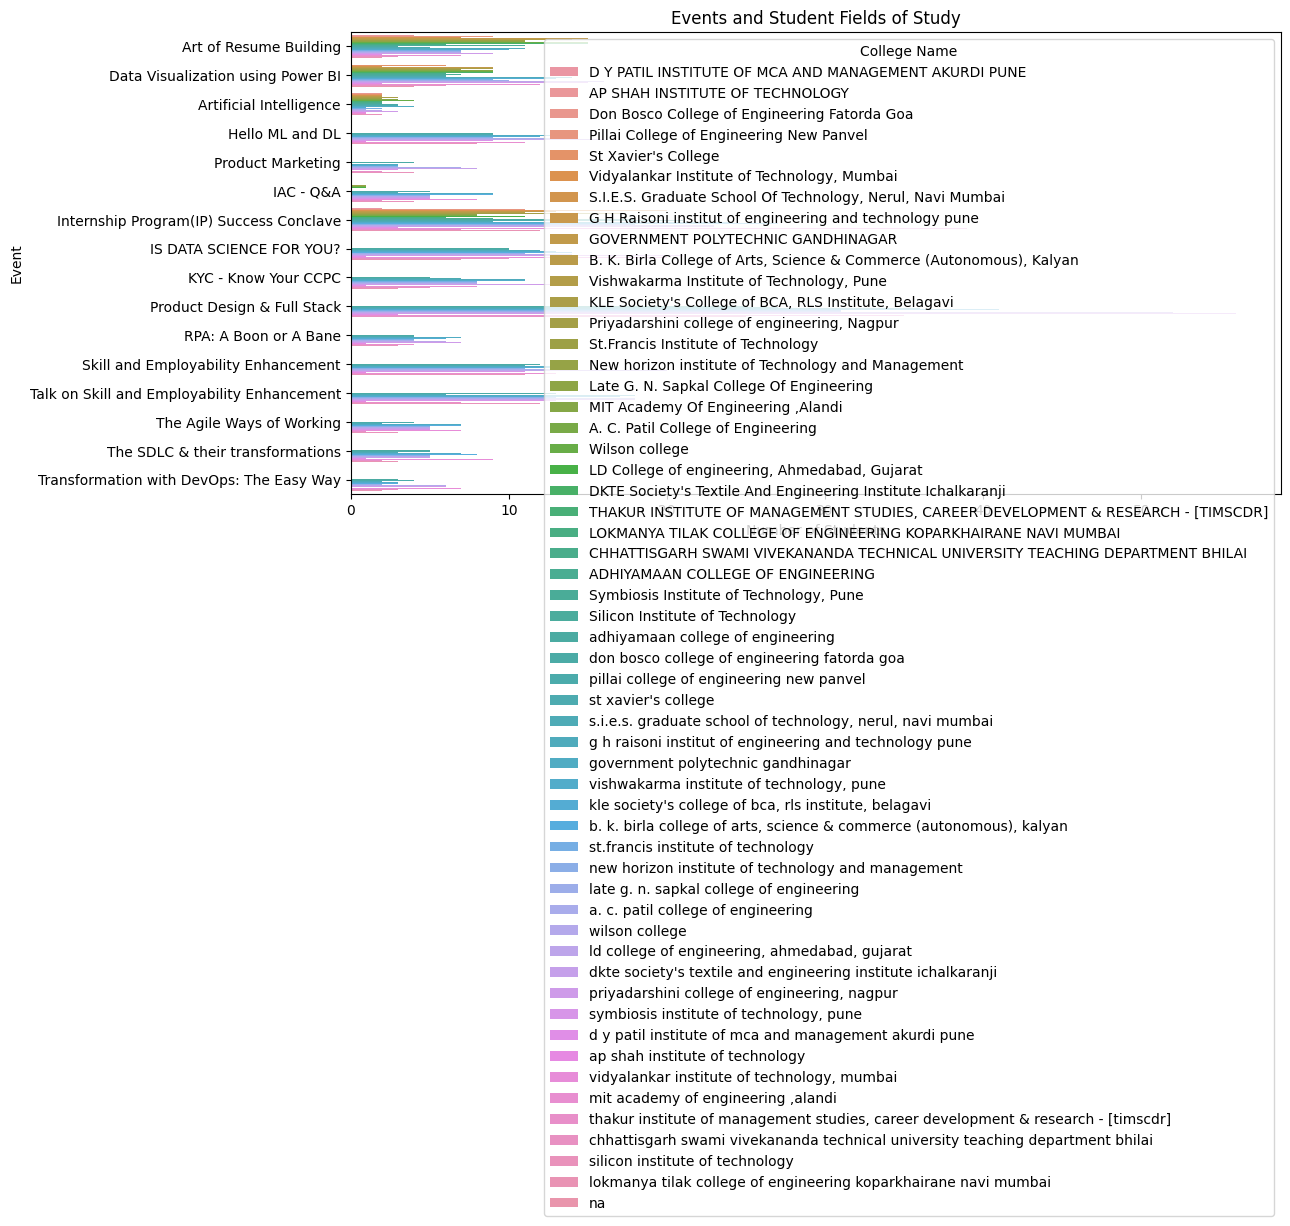

In [159]:
# 12. Which event tend to attract more students from specific fields of study?
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y="Events", hue="College Name")
plt.title("Events and Student Fields of Study")
plt.xlabel("Number of Students")
plt.ylabel("Event")
plt.legend(title="College Name")
plt.show()


#**13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?**

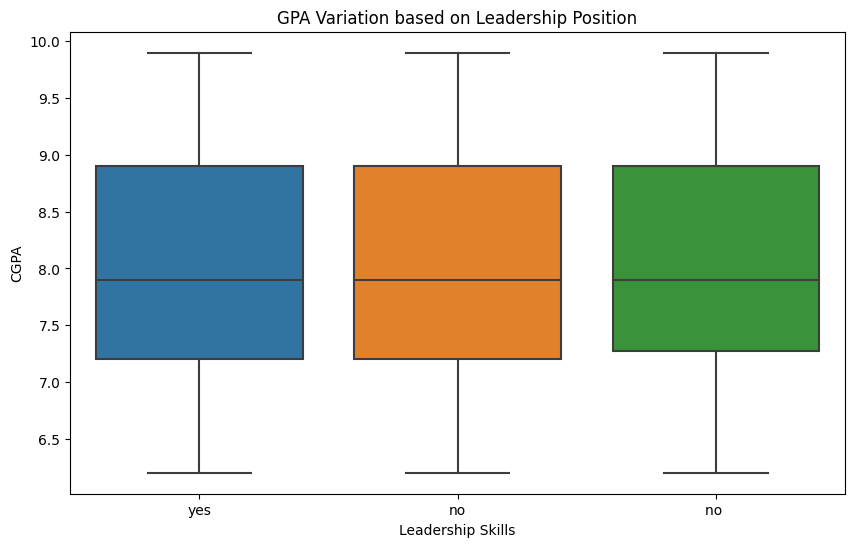

In [160]:
# 13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Leadership- skills", y="CGPA")
plt.title("GPA Variation based on Leadership Position")
plt.xlabel("Leadership Skills")
plt.ylabel("CGPA")
plt.show()

#**14. How many students are graduating by the end of 2024?**

In [161]:
# 14. How many students are graduating by the end of 2024?
current_year = 2023
graduating_students = data[data["Year of Graduation"] <= 2024]["Email ID"].nunique()
print("Number of students graduating by the end of 2024:", graduating_students)

Number of students graduating by the end of 2024: 1664


#**15. Which promotion channel brings in more student participations for the event?**

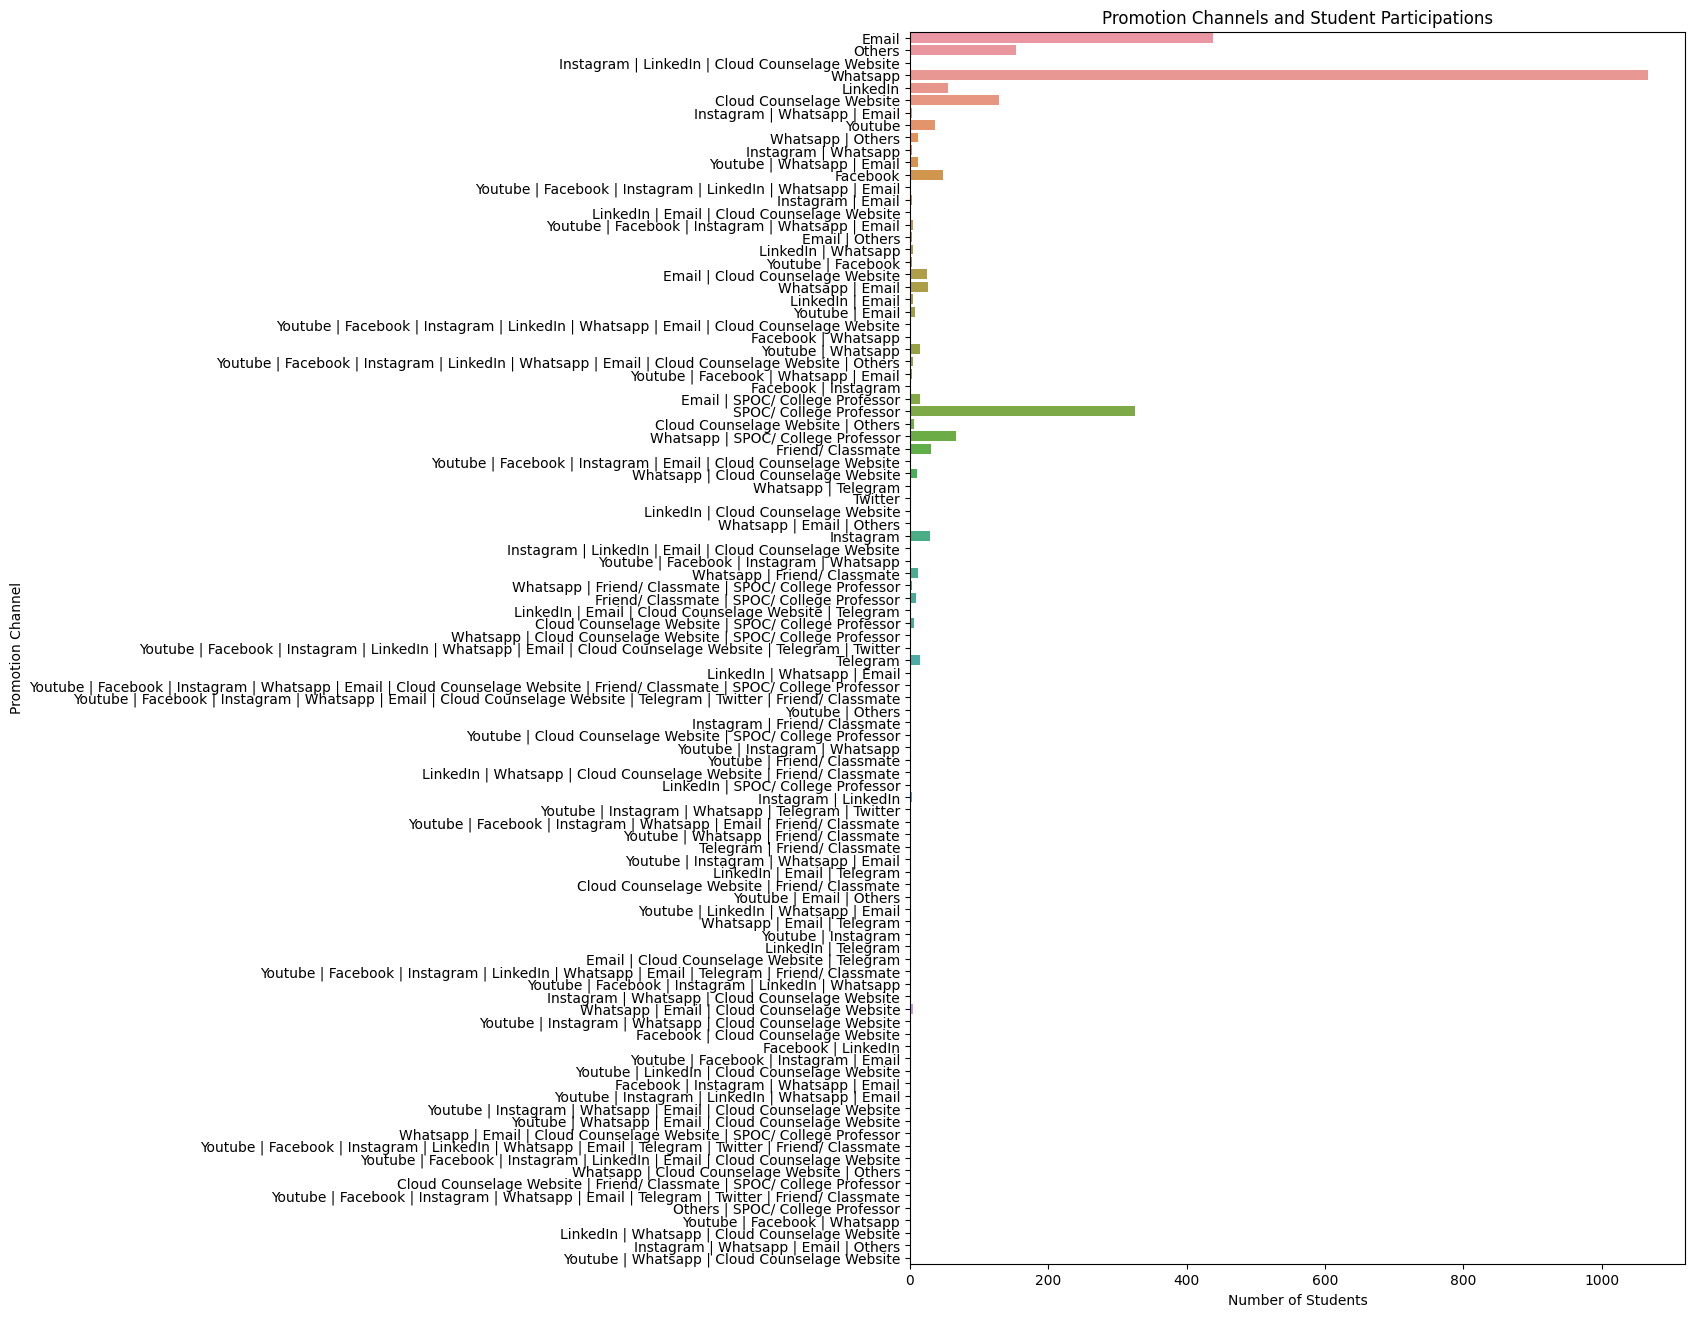

In [162]:
# 15. Which promotion channel brings in more student participations for the event?
plt.figure(figsize=(10, 16))
sns.countplot(data=data, y="How did you come to know about this event?")
plt.title("Promotion Channels and Student Participations")
plt.xlabel("Number of Students")
plt.ylabel("Promotion Channel")
plt.show()

#**16. Find the total number of students who attended the events related to Data Science?**

In [163]:
# 16. Find the total number of students who attended the events related to Data Science?
data_science_related_events = ["Data Visualization using Power BI", "Hello ML and DL", "IS DATA SCIENCE FOR YOU?"]
data_science_attendees = data[data["Events"].isin(data_science_related_events)]["Email ID"].nunique()
print("Total number of students attended Data Science related events:", data_science_attendees)

Total number of students attended Data Science related events: 750


#**17. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)**

In [164]:
# 17. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)
high_cgpa_experience = data[(data["CGPA"] > 8.0) & (data["Experience with python (Months)"] > 5)]
avg_high_salary = high_cgpa_experience["Expected salary (Lac)"].mean()
print("Average expected salary for high CGPA and more experienced students:", avg_high_salary)

Average expected salary for high CGPA and more experienced students: 16.9203187250996


#**18. How many students know about the event from their colleges? Which of these Top 5 colleges?**

In [165]:
# 18. How many students know about the event from their colleges? Which of these Top 5 colleges?
# college_event_counts = data[data["How did you come to know about this event?"].str.startswith("From College")]["College Name"].value_counts().nlargest(5)
# print("Number of students who know about the event from their colleges (Top 5):\n", college_event_counts)

